# Student Mental Health
## Data Filtering - Topic Modelling
Author: Harman Gill



## Install Libraries

In [ ]:
!pip install gensim
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 6.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9990335ad7d958bbaaa3a6855836d8bb9784d8f85e1ad7e6b680789f0f0a15ab
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

import gensim
from gensim import corpora
from ast import literal_eval
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.test.utils import datapath
from gensim import models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


## Load the Data

In [ ]:
file = files.upload()

Saving PreprocessedPosts.json to PreprocessedPosts.json


In [ ]:
df = pd.read_json('PreprocessedPosts.json')
print(df)

           id                author  \
0      abcz5u           lit12345yxz   
1      abd016        PolysciStudent   
2      abdm2o       doyouevenschool   
3      abev8w         ilovedogs1017   
4      abewo8              delciopp   
...       ...                   ...   
56256  vodkit             vivian352   
56257  vodxga           WildWiggety   
56258  voh3lj             Kermolion   
56259  vojc2e                nurkee   
56260  voky74  Mysterious-Chart-930   

                                    author_flair_text  \
0                                                None   
1                                                None   
2                                                None   
3                                                None   
4                                        MEC E Year 2   
...                                               ...   
56256                                            None   
56257    Prospective Student - Faculty of Engineering   
56258         Unde

In [ ]:
posts = df.preprocessed_post

In [ ]:
print(posts)

0        [pharmd, application, hop, anything, applied, ...
1        [happy, new, year, wish, happy, new, year, lea...
2        [new, year, resolution, learn, accept, polysci...
3        [winter, term, midterm, anyone, know, midterm,...
4                                  [new, year, resolution]
                               ...                        
56256    [starbucks, tim, hortons, etc, always, hire, i...
56257    [laptop, computer, engineer, seek, recommendat...
56258    [computer, game, development, certificate, que...
56259    [unofficial, second, year, eng, gpa, submissio...
56260    [student, health, care, anyone, explain, proce...
Name: preprocessed_post, Length: 56261, dtype: object


## LDA Model

In [ ]:
dictionary = corpora.Dictionary(posts)

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in posts]

### Optimize number of topics

In [ ]:
coherence = []
for k in range(10, 16):
  print('Round: '+str(k))
  lda = gensim.models.ldamodel.LdaModel
  ldamodel = lda(doc_term_matrix, num_topics=k, id2word=dictionary, passes=40, iterations=200, chunksize=10000, eval_every=None)

  cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=posts, dictionary=dictionary, coherence= 'c_v')
  
  coherence.append((k,cm.get_coherence()))

Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15


In [ ]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

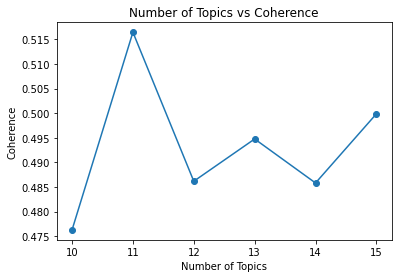

In [ ]:
plt.plot(x_val, y_val)
plt.scatter(x_val, y_val)
plt.title('Number of Topics vs Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [ ]:
print(x_val)

[10, 11, 12, 13, 14, 15]


In [ ]:
print(y_val)

[0.47625804833640445, 0.5164735727689124, 0.4861622431531056, 0.49476055766047106, 0.48580708407673173, 0.49987636854695666]


In [ ]:
lda = gensim.models.ldamodel.LdaModel
ldamodel =lda(doc_term_matrix, num_topics=11, id2word = dictionary, passes=40, iterations=200, chunksize=10000, eval_every=None, random_state=0)

In [ ]:
ldamodel.show_topics(11, num_words=15, formatted=False)

[(0,
  [('anyone', 0.05947284),
   ('class', 0.04186661),
   ('please', 0.024237826),
   ('note', 0.023217091),
   ('know', 0.020993002),
   ('help', 0.020961419),
   ('study', 0.01953266),
   ('would', 0.01800768),
   ('lecture', 0.017471094),
   ('econ', 0.015513339),
   ('remove', 0.014711312),
   ('soc', 0.013111452),
   ('thanks', 0.012420086),
   ('syllabus', 0.011776646),
   ('someone', 0.01161071)]),
 (1,
  [('get', 0.02146714),
   ('like', 0.019481862),
   ('time', 0.014802326),
   ('feel', 0.012565909),
   ('people', 0.012344976),
   ('make', 0.012111967),
   ('really', 0.0112413345),
   ('know', 0.010839361),
   ('want', 0.009480986),
   ('even', 0.009155458),
   ('think', 0.008979148),
   ('work', 0.008460366),
   ('class', 0.007525677),
   ('thing', 0.00744091),
   ('year', 0.0073426594)]),
 (2,
  [('campus', 0.03471105),
   ('know', 0.017715057),
   ('anyone', 0.017446151),
   ('place', 0.015629733),
   ('find', 0.012695946),
   ('get', 0.012630358),
   ('use', 0.01165892

## Relevancy Scores

### Number of topics: 11

In [ ]:
topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


### Get the top terms according to relevancy score

In [ ]:
all_topics = {}
num_terms = 15
lambd = 0.1
for i in range(1,12): 
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

### Get the top terms according to frequency score

In [ ]:
all_topics2 = {}
num_terms = 15
lambd = 1.0
for i in range(1,12): 
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics2['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

In [ ]:
topics = pd.DataFrame(all_topics).T

In [ ]:
topics2 = pd.DataFrame(all_topics2).T

In [ ]:
topics[:11]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Labels
Topic 1,feel,always,alone,thing,people,honestly,shit,literally,hate,motivation,spend,internet,friend,rant,everything,mental_health
Topic 2,program,engineering,gpa,transfer,science,degree,nursing,bsc,specialization,bachelor,competitive,admission,master,honor,undergrad,degree_program
Topic 3,course,spring,take,summer,elective,level,enroll,bioch,wrs,engl,schedule,hist,doable,french,zool,courses
Topic 4,email,deadline,beartracks,submit,loan,date,bear_track,defer,refund,december,enrolment,grant,proctor,payment,deposit,administration
Topic 5,canada,club,event,survey,community,team,volunteer,vote,form_gle,government,election,participate,html,union,virtual,politics
Topic 6,econ,note,stats,syllabus,swap,soc,edu,willing,mwf,civ_e,buddy,wagner,lecture,gainer,buec,courses2
Topic 7,final,exam,mark,poll,write,midterm,grade,view_poll,curve,essay,quiz,calculator,scale,percent,distribution,assessments
Topic 8,park,building,laptop,card,bus,rent,onecard,insurance,opt,car,arc_card,dental,upass,photo,campus,resources
Topic 9,book,library,floor,tutor,code,youtube,vaccine,rutherford,bookstore,lock,download,edition,bathroom,manual,washroom,resources2
Topic 10,preview_redd_it,png_width_format_png_auto_webp,doctor,vaccination,server,jpg_width_format_pjpg_auto_webp,drink,symptom,clinic,parking,discord_server,glass,pain,rapid_test,night,covid


In [ ]:
topics2[:11]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Labels
Topic 1,get,like,time,feel,people,make,really,know,want,even,think,work,class,thing,year,mental_health
Topic 2,year,program,get,science,student,gpa,first,apply,engineering,would,degree,transfer,school,major,know,degree_program
Topic 3,course,take,class,spring,anyone,math,semester,summer,fall,term,would,winter,year,online,one,courses
Topic 4,get,email,anyone,say,student,still,know,time,application,class,deadline,beartracks,back,day,receive,administration
Topic 5,student,university,ualberta,alberta,www,com,international,research,canada,club,look,join,group,campus,uofa,politics
Topic 6,anyone,class,please,note,know,help,study,would,lecture,econ,remove,soc,thanks,syllabus,someone,courses2
Topic 7,final,exam,grade,midterm,mark,write,question,get,prof,average,assignment,math,class,reddit,test,assessments
Topic 8,campus,know,anyone,place,find,get,use,one,park,lose,building,open,room,laptop,pay,resources
Topic 9,lab,use,book,textbook,library,open,floor,access,name,need,tutor,video,code,buy,free,resources2
Topic 10,preview_redd_it,night,food,png_width_format_png_auto_webp,covid,fuck,test,day,doctor,morning,today,server,eat,vaccination,man,covid


### Label the topics

In [ ]:
labels = ['mental_health', 'degree_program', 'courses', 'administration', 'politics', 'courses2', 'assessments', 'resources', 'resources2', 'covid','student_life']

In [ ]:
topics['Labels'] = labels

In [ ]:
topics2['Labels'] = labels

In [ ]:
topics.to_csv('RelevancyTopics.csv', header=True)

In [ ]:
topics.to_json('RelevancyTopics.json', orient='columns')

In [ ]:
topics2.to_csv('FrequencyTopics.csv', header=True)

In [ ]:
topics2.to_json('FrequencyTopics.json', orient='columns')

## Save the Models

In [ ]:
ldamodel.save("Model")

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


## Load the Models

In [ ]:
model = models.ldamodel.LdaModel.load("Model")

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
